Data Source: https://www.kaggle.com/datasets/lgmoneda/br-coins

In [1]:
import os
import shutil

import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
!ls tmp/coins_image_regression

coins_image_regression.csv images


In [6]:
!ls -l  tmp/coins_image_regression/images | wc -l

    6029


In [8]:
d = pd.read_csv('tmp/coins_image_regression/coins_image_regression.csv')
print(d.shape)
d

(6028, 3)


,image_path,label,fold
0,105_1479344562.jpg,105,1
1,105_1479344940.jpg,105,2
2,125_1479424716.jpg,125,1
3,90_1477856976.jpg,90,0
4,50_1477283274.jpg,50,2
...,...,...,...
6023,120_1479351402.jpg,120,3
6024,100_1477279920.jpg,100,4
6025,50_1477282626.jpg,50,0
6026,100_1477858716.jpg,100,4


In [25]:
d = d.rename(columns={'image_path':'image'})

In [26]:
d['label'].describe()

count    6028.000000
mean       62.962840
std        44.739969
min         5.000000
25%        25.000000
50%        55.000000
75%       100.000000
max       175.000000
Name: label, dtype: float64

<AxesSubplot: >

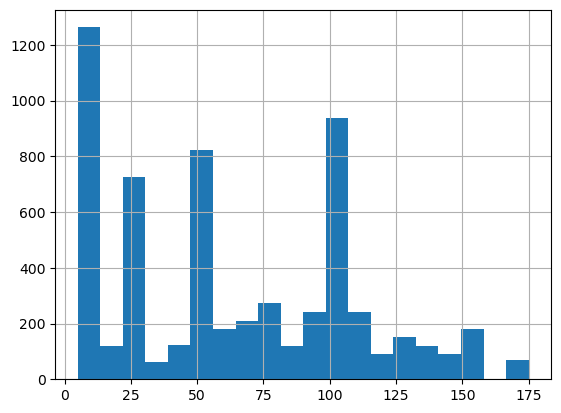

In [27]:
d['label'].hist(bins=20)

In [28]:
d['fold'].value_counts()

1    1206
2    1206
0    1206
3    1205
4    1205
Name: fold, dtype: int64

In [29]:
d_train, d_test = train_test_split(d, test_size=600, random_state=123)#, stratify=d['label'])
d_train.shape, d_test.shape

((5428, 3), (600, 3))

In [30]:
d_train['fold'].value_counts()

1    1094
3    1088
0    1086
4    1081
2    1079
Name: fold, dtype: int64

In [31]:
d_test['fold'].value_counts()

2    127
4    124
0    120
3    117
1    112
Name: fold, dtype: int64

### DAI data

In [32]:
d_train.to_csv('tmp/DAI/coin_regression_DAI_Train/train.csv', index=False)
d_test.to_csv('tmp/DAI/coin_regression_DAI_Test/test.csv', index=False)

In [34]:
!ls tmp/coins_image_regression

coins_image_regression.csv images


In [35]:
# Train image copy
for im in d_train['image']:
    from_dir = os.path.join('tmp', 'coins_image_regression', 'images', im)
    #print(from_dir)
    to_dir = os.path.join('tmp', 'DAI', 'coin_regression_DAI_Train', 'images', im)
    #print(to_dir)
    shutil.copy(from_dir, to_dir)

In [36]:
!ls -l tmp/DAI/coin_regression_DAI_Train/images | wc -l

    5429


In [37]:
# Test image copy
for im in d_test['image']:
    from_dir = os.path.join('tmp', 'coins_image_regression', 'images', im)
    #print(from_dir)
    to_dir = os.path.join('tmp', 'DAI', 'coin_regression_DAI_Test', 'images', im)
    #print(to_dir)
    shutil.copy(from_dir, to_dir)

In [38]:
!ls -l tmp/DAI/coin_regression_DAI_Test/images | wc -l

     601


### HT and PT dataset

In [39]:
d_train.to_csv('tmp/HT/coin_regression_HT/train.csv', index=False)
d_test.to_csv('tmp/HT/coin_regression_HT/test.csv', index=False)